<a href="https://colab.research.google.com/github/Chandan-Javali/dem_py/blob/main/d3_t1_n0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/climate_data.csv

NameError: name 'content' is not defined

In [ ]:
#load climate_data csv

import pandas as pd


data = pd.read_csv('/content/climate_data.csv')

print(data.head())


   Temperature   Humidity    Rainfall  Wind Speed  Solar Radiation  \
0    26.236204  46.154857  145.999662   12.762891         3.793472   
1    43.521429  43.303847   36.902399    9.185849         2.568907   
2    36.959818  32.330774   69.327939   19.289970         2.758155   
3    32.959755  62.508667  132.656127    4.379569         3.084027   
4    19.680559  53.363691   96.417869   11.757128         3.221920   

      Pressure  Population Density  Industrial Activity Index  Green Cover  \
0  1034.723658         7441.396511                   0.042661    67.271512   
1   999.451704         8822.908563                   0.828505    20.168883   
2   969.546561         4685.480766                   0.249308    76.252466   
3  1023.664179         2962.869444                   0.283937    69.025688   
4   991.867814         3256.581086                   0.226245    74.319731   

   Air Quality Index  Energy Consumption  
0         269.289789         2254.722860  
1         276.793110    

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf



In [ ]:

import numpy as np



In [ ]:


#selet features(X) and target variable(y)
x=data.drop(columns=["Energy Consumption"])
y=data["Energy Consumption"]

#split the data into training and testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

#scale the features
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

#step6 Build the FNN model

In [ ]:
# prompt: Build the FNN Model  activation is linear Compile the model Train the Model Evaluate the Model Make Predictions

#step6 Build the FNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) # Output layer with linear activation for regression

#step7 Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#step8 Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

#step9 Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"Mean Absolute Error on test data: {mae}")

#step10 Make predictions
y_pred = model.predict(x_test)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3074686.2500 - mae: 1529.8362 - val_loss: 2835607.7500 - val_mae: 1466.6541
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2515543.5000 - mae: 1368.2559 - val_loss: 1288158.5000 - val_mae: 967.1730
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 896299.3750 - mae: 789.9594 - val_loss: 124338.9609 - val_mae: 309.6510
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77181.3516 - mae: 233.5549 - val_loss: 31398.3672 - val_mae: 136.7780
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28920.1211 - mae: 128.8596 - val_loss: 25395.3223 - val_mae: 123.5640
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24794.0391 - mae: 120.5892 - val_loss: 23323.8906 - val_mae: 120.4007
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22122.0312 - mae: 115.9523 - val_loss: 22177.7754 - val_mae: 118.2789
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21803.8047 - mae: 116

In [ ]:
# prompt: import libraries, same as last one, load predict_energy_consumption csv file ,  fNN with simple program on Energy Prediction,

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

# Load the dataset
data = pd.read_csv('/content/predict_energy_consumption.csv')

# Print some info
print(data.head())
print(data.info())
print(data.describe())

# Select features (X) and target variable (y)
# Assuming 'Energy Consumption' is the target column.  Adjust if needed.
x = data.drop(columns=["Energy Consumption"])
y = data["Energy Consumption"]

# Handle missing values (if any) -  Example: filling with mean
for col in x.columns:
    if x[col].isnull().any():
        x[col] = x[col].fillna(x[col].mean())


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# Build the FNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"Mean Absolute Error on test data: {mae}")

# Make predictions
y_pred = model.predict(x_test)


   temperature   humidity  wind_speed  solar_irradiance  energy_consumption
0    24.363503  31.107976    5.234114        705.432695          307.398145
1    38.767858  52.514057    4.939576        817.013257          412.444548
2    33.299849  72.376750   18.125092        325.421109          392.072418
3    29.966462  63.933493    4.990924        662.386690          119.254957
4    18.900466  68.393669    5.438995        614.571385          117.162261
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None
       temperature     humidity   wind_speed  sola

KeyError: "['Energy Consumption'] not found in axis"

📌 Dataset Preview:
    temperature   humidity  wind_speed  solar_irradiance  energy_consumption
0    24.363503  31.107976    5.234114        705.432695          307.398145
1    38.767858  52.514057    4.939576        817.013257          412.444548
2    33.299849  72.376750   18.125092        325.421109          392.072418
3    29.966462  63.933493    4.990924        662.386690          119.254957
4    18.900466  68.393669    5.438995        614.571385          117.162261

📌 Column Names:
 Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 89519.8438 - mae: 270.3227 - val_loss: 83714.2656 - val_mae: 259.0356
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87311.0156 - mae: 266.7365 - val_loss: 82897.8047 - val_mae: 257.4447
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85321.8281 - mae: 261.3358 - val_loss: 80878.9531 - val_mae: 253.4476
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85320.9141 - mae: 260.9406 - val_loss: 76317.7578 - val_mae: 244.1539
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 81081.3203 - mae: 254.1750 - val_loss: 67611.5781 - val_mae: 225.2736
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68462.3438 - mae: 227.4797 - val_loss: 53784.6367 - val_mae: 193.3269
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52406.1758 - mae: 192.0217 - val_loss: 36918.5664 - val_mae: 155.0286
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34439.3320 - mae: 152.0966 - val_loss: 23923.3398

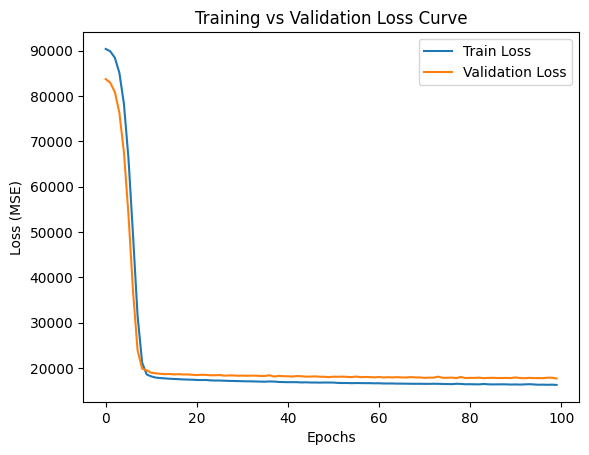

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset (Ensure the file is in /content/)
file_path = "/content/predict_energy_consumption.csv"  # Corrected path for Colab
data = pd.read_csv(file_path)

# Step 2: Check for missing values
if data.isnull().sum().sum() > 0:
    print("⚠️ Warning: Dataset contains missing values. Consider handling them before training.")

# Step 3: Display dataset info
print("📌 Dataset Preview:\n", data.head())
print("\n📌 Column Names:\n", data.columns)

# Step 4: Define features (X) and target variable (y)
X = data.drop(columns=["energy_consumption"])  # Target variable corrected
y = data["energy_consumption"]

# Step 5: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build the FNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer for regression
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 9: Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Step 10: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"\n✅ Model Evaluation:\nMean Absolute Error on Test Data: {mae}")

# Step 11: Make Predictions
y_pred = model.predict(X_test)

# Step 12: Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss Curve')
plt.legend()
plt.show()
